In [72]:
import random
import matplotlib.pyplot as plt

In [64]:
# data = [(11,8),(33,6),(24,3),(44,1),(55,7),(61,4),(53,4),(62,6),(72,2)]
# data = [(9,8),(9,2),(8,3),(7,4),(6,5),(5,6),(4,7),(3,8),(2,9),(-1,10),(3,3),(5,5),(6,6),(-10,8),(-18,65),(1,10),(23,22)]

1.**Right to left variant implementation**

In [73]:
# Initialize a global list to store the number of comparisons made in each function call
comprison_list_rl = []

# Define a function to find the maximal right-to-left points
def maximalR2L(data):
    # Access the global comparison list
    global comprison_list_rl

    # Sort the input data based on the x-coordinate in descending order
    sorted_points = sorted(data, key=lambda point: point[0], reverse=True)

    # Get the total number of points in the sorted list
    n = len(sorted_points)

    # Initialize a list to store the maximal points
    result = [sorted_points[0]]

    # Initialize a variable to count the number of comparisons
    comparison = 0

    # Iterate through the sorted points starting from the second point
    i = 1
    while i < n:
        # Increment the comparison count for each iteration
        comparison += 1

        # Extract the x and y coordinates of the current point
        x, y = sorted_points[i]

        # Check if the y-coordinate of the current point is greater than the last point in the result
        if y > result[-1][1]:
            # If true, add the current point to the result list
            result.append((x, y))

        # Move to the next point in the sorted list
        i += 1

    # Append the total number of comparisons made to the global list
    comprison_list_rl.append(comparison)

    # Print the number of comparisons made in this function call
    print("The Number of comparison is: ", comparison)

    # Return the list of maximal points
    return result


In [66]:
# print(maximalR2L(data))

2.**Left to Right variant Implementation**

In [67]:
# Initialize a global list to store the number of comparisons made in each function call
comprison_list_lr = []

# Define a function to find the maximal left-to-right points
def maximalL2R(data):
    # Access the global comparison list
    global comprison_list_lr

    # Sort the input data based on the x-coordinate in ascending order
    sorted_points = sorted(data, key=lambda point: point[0])

    # Get the total number of points in the sorted list
    n = len(sorted_points)

    # Initialize a list to store the maximal points
    result = [sorted_points[0]]

    # Initialize the comparison counter
    comparison = 0

    # Iterate through the sorted points starting from the second point
    i = 1
    while i < n:
        # Increment the comparison count for each iteration
        comparison += 1

        # Extract the x and y coordinates of the current point
        x, y = sorted_points[i]

        # Check if the y-coordinate of the current point is greater than the last point in the result
        if y > result[-1][1]:
            # Remove points from the result list until a point with a lower y-coordinate is encountered
            while len(result) > 0:
                comparison += 1
                if y > result[-1][1]:
                    result.pop()
                else:
                    break

            # Add the current point to the result list
            result.append((x, y))
        else:
            # If the y-coordinate is not greater, simply add the current point to the result list
            result.append((x, y))

        # Move to the next point in the sorted list
        i += 1

    # Append the total number of comparisons made to the global list
    comprison_list_lr.append(comparison)

    # Print the number of comparisons made in this function call
    print("The Number of comparison is: ", comparison)

    # Return the list of maximal points
    return result

In [68]:
# print(maximalL2R(data))

In [69]:
import random

# Define a function to generate a list of random points
def generate_random_points(num_points):
    # Set the minimum and maximum coordinates for the random points
    min_coord = 0
    max_coord = num_points

    # Initialize an empty list to store the generated points
    points = []

    # Generate random (x, y) coordinates for the specified number of points
    for _ in range(num_points):
        x = random.randint(min_coord, max_coord)
        y = random.randint(min_coord, max_coord)
        points.append((x, y))

    # Call the maximalL2R function with the generated points
    maximalL2R(points)

    # Call the maximalR2L function with the generated points
    maximalR2L(points)

    # No need to return anything as the functions print their results
    return


In [ ]:
num = []
for i in range(25,1000,10):
    num.append(i)
    generate_random_points(i)

**Comparison between these to algorithms**

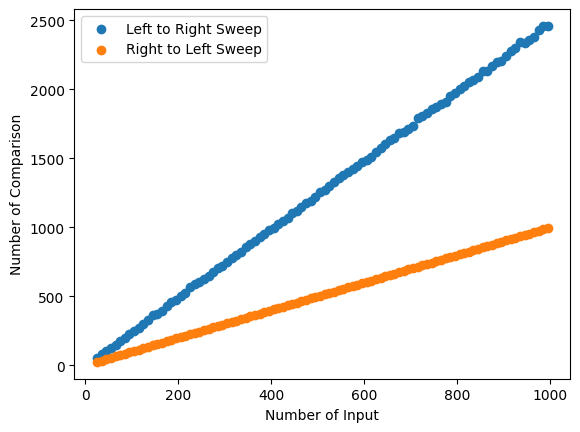

In [71]:
plt.scatter(num, comprison_list_lr, label='Left to Right Sweep')
plt.scatter(num, comprison_list_rl, label='Right to Left Sweep')
plt.xlabel('Number of Input')
plt.ylabel('Number of Comparison')
plt.legend()
plt.show()